# Clustering - New York

Using the K-Means clustering algorithm, it will create clusters with the Covid-19 data in New York counties. </br>
The main objective with looking at geography is to see if the clustering will show a direct relationship between the number of covid cases and population density in the counties.</br>
There should be obvious signs in our clusters that the counties that are located near populous cities have drastically more covid cases.</br></br>

Data is taken from: https://covid.cdc.gov/covid-data-tracker/#county-view?list_select_state=Maryland&data-type=Cases&metric-cases=Cases_7_day_count_change


### Importing all the libraries and data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans

In [2]:
# import the data csv file

data = pd.read_csv('county_level_latest_data_for_new_york.csv', skiprows=2, on_bad_lines='skip')
data.columns = [x.replace("\n", " ") for x in data.columns.to_list()]
data.head()

,FIPS code,State Name,County,Weekly Cases,Weekly Case rate /100k,% Change in weekly Cases from past week,Test positivity rate - last 7 days,Test positivity rate - absolute change,Total diagnostic tests - last 7 days,Total diagnostic tests per 100k - last 7 days,...,Percent uninsured - US,Poverty rate - US,Percent population 65+ years - US,Total county population,Metropolitan status,NCHS urban/rural class,RUCC description,Total state population,Total US population,Health Service Area Number
0,36001,New York,Albany County,274,89.69,30.48,8.73,-1.05,3099,1020.57,...,9.2,10.5,16.3,305506,Metro,Medium metro,Counties in metro areas of 250000 to 1 million...,19453561,331996199,10
1,36003,New York,Allegany County,24,52.07,-25.00,7.05,1.57,507,1112.16,...,9.2,10.5,16.3,46091,Non-metro,Noncore,Urban population of 2500 to 19999 not adjacent...,19453561,331996199,35
2,36005,New York,Bronx County,4965,350.09,54.24,13.31,-0.48,30259,2159.60,...,9.2,10.5,16.3,1418207,Metro,Large central metro,Counties in metro areas of 1 million populatio...,19453561,331996199,94
3,36007,New York,Broome County,259,135.97,77.40,8.29,-0.40,3537,1867.28,...,9.2,10.5,16.3,190488,Metro,Small metro,Counties in metro areas of 250000 to 1 million...,19453561,331996199,19
4,36009,New York,Cattaraugus County,32,42.04,10.34,5.69,0.13,591,779.04,...,9.2,10.5,16.3,76117,Non-metro,Micropolitan,Urban population of 20000 or more adjacent to ...,19453561,331996199,35


### Prepping for K-means CLustering

In [3]:
X = data[['Population density - county','Weekly Cases']]

### Elbow Method to Find the Optimal K-value

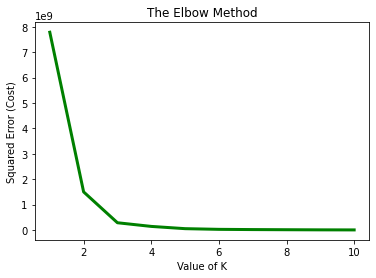

In [4]:
cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(X)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)    
 
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.title('The Elbow Method')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

### Implementation of K-means clustering using the Sklearn library

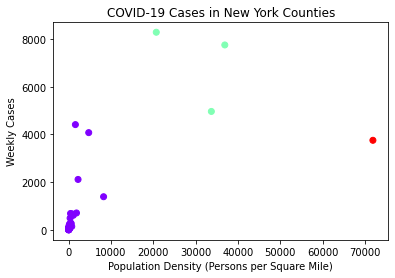

In [12]:
# Using sklearn library, implement K-means clustering

kmeans = KMeans(3) # From the value taken from the elbow method
kmeans.fit(X)
identified_clusters = kmeans.fit_predict(X)

data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Population density - county'],data_with_clusters['Weekly Cases'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.title('COVID-19 Cases in New York Counties')
plt.xlabel('Population Density (Persons per Square Mile)')
plt.ylabel('Weekly Cases')
plt.show()

### Evaluating the Quality of the Clustering with the Silhouette Score

In [13]:
score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Average Silhouette Score over All Samples: %.3f' % score)

Average Silhouette Score over All Samples: 0.932
